In [1]:
## Notebook example to read the time-series value / coordinate info

% matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from pysar.objects import timeseries
from pysar.utils import readfile

work_dir = os.path.expanduser('~/insarlab/PYSAR_EXAMPLE/FernandinaSenDT128/PYSAR/GEOCODE')
ts_file  = os.path.join(work_dir, 'geo_timeseries_ECMWF_ramp_demErr_masked.h5')
vel_file = os.path.join(work_dir, 'geo_velocity_masked.h5')

ts_obj = timeseries(ts_file)
ts_obj.open()

def get_lat_lon(meta, mask=None):
    """extract lat/lon info of all grids into 2D matrix
    Parameters: meta : dict, including X/Y_FIRST/STEP and LENGTH/WIDTH info
    Returns:    lats : 2D np.array for latitude  in size of (length, width)
                lons : 2D np.array for longitude in size of (length, width)
    """
    # generate 2D matrix for lat/lon
    lat_num = int(meta['LENGTH'])
    lon_num = int(meta['WIDTH'])
    lat0 = float(meta['Y_FIRST'])
    lon0 = float(meta['X_FIRST'])
    lat_step = float(meta['Y_STEP'])
    lon_step = float(meta['X_STEP'])
    lat1 = lat0 + lat_step * lat_num
    lon1 = lon0 + lon_step * lon_num
    lats, lons = np.mgrid[lat0:lat1:lat_num*1j,
                          lon0:lon1:lon_num*1j]
    return lats, lons

open timeseries file: geo_timeseries_ECMWF_ramp_demErr_masked.h5


In [2]:
## read data
# Time
dates = np.array(ts_obj.times)                # 1D np.array of dates in datetime.datetime object in size of [num_date,]

# Velocity / time-series
vel = readfile.read(vel_file)[0]
mask = ~np.isnan(vel)                         # matrix indicating valid pixels (True for valid, False for invalid)
vel = readfile.read(vel_file)[0][mask]        # 1D np.array of velocity   in np.float32 in size of [num_pixel,] in meter/year
ts = readfile.read(ts_file)[0][:, mask]       # 2D np.array of time-sries in np.float32 in size of [num_date, num_pixel] in meter

# Spatial coordinates
lats, lons = get_lat_lon(ts_obj.metadata)
lats = lats[mask]                             # 1D np.array of latitude  in np.float32 in size of [num_pixel,] in degree
lons = lons[mask]                             # 1D np.array of longitude in np.float32 in size of [num_pixel,] in degree

In [3]:
# For example, here is the information of the 101 pixel for example
idx = 100
print('Latitude : {} deg'.format(lats[idx]))
print('Longitude: {} deg'.format(lons[idx]))
print('Velocity:', vel[idx])
print('Dates:', dates)
print('Displacement time-series:', ts[:, idx])

Latitude : -0.265259655920761 deg
Longitude: -91.48614171932762 deg
Velocity: 0.000273502
Dates: [datetime.datetime(2014, 12, 13, 0, 0)
 datetime.datetime(2014, 12, 25, 0, 0) datetime.datetime(2015, 3, 7, 0, 0)
 datetime.datetime(2015, 3, 19, 0, 0) datetime.datetime(2015, 3, 31, 0, 0)
 datetime.datetime(2015, 4, 12, 0, 0) datetime.datetime(2015, 4, 24, 0, 0)
 datetime.datetime(2015, 5, 6, 0, 0) datetime.datetime(2015, 5, 18, 0, 0)
 datetime.datetime(2015, 5, 30, 0, 0) datetime.datetime(2015, 6, 11, 0, 0)
 datetime.datetime(2015, 6, 23, 0, 0) datetime.datetime(2015, 7, 17, 0, 0)
 datetime.datetime(2015, 7, 29, 0, 0) datetime.datetime(2015, 8, 22, 0, 0)
 datetime.datetime(2015, 9, 3, 0, 0) datetime.datetime(2015, 9, 15, 0, 0)
 datetime.datetime(2015, 9, 27, 0, 0) datetime.datetime(2015, 10, 9, 0, 0)
 datetime.datetime(2015, 10, 21, 0, 0)
 datetime.datetime(2015, 11, 2, 0, 0)
 datetime.datetime(2015, 11, 14, 0, 0)
 datetime.datetime(2015, 11, 26, 0, 0)
 datetime.datetime(2015, 12, 8, 0, 0

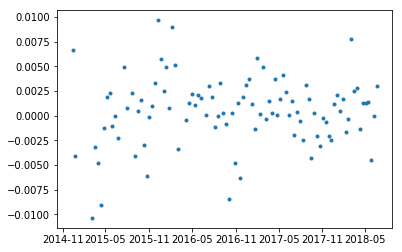

In [4]:
# This is how the time-series looks like
plt.figure()
plt.plot(dates, ts[:,idx], '.')
plt.show()

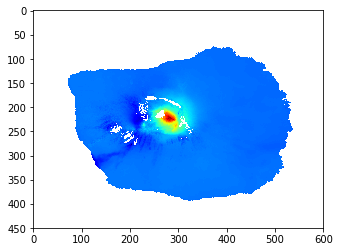

In [5]:
# This is how the data looks like in velocity map
plt.figure()
plt.imshow(readfile.read(vel_file)[0], cmap='jet')
plt.show()